# Capstone Project

# to be done:
- loss ananlysis
    - by shops
    - by items
    - by cata
    - by shop-item

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', None)

import pickle
import time

#import googletrans
#from googletrans import Translator
#to avoid instantiate too many translator, we created one instance for the whole notebook
#translator = Translator()

In [65]:
#!pip install googletrans==3.1.0a0

# define functions

In [66]:
def import_data(path):
    df = pd.read_csv(path)
    
    print("printing dataframe shape")
    print(df.shape)
    
    print("\n\nprinting dataframe info")
    df.info()
    
    print("\n\nprinting first 5 rows")
    print(df.head())
    
    print("\n\nprinting descriptive statistics")
    print(df.describe())
    
    print("\n\nprinting null value summary")
    print(df.isnull().sum())
    return df

In [67]:
def translate_cat(row):
    cat_name_ru = row['item_category_name']
    
    # translator = Translator()
    result = translator.translate(cat_name_ru, src='ru')
    return result.text

In [68]:
def translate_item(row):
    item_name_ru = row['item_name']
    
   # translator = Translator()
    result = translator.translate(item_name_ru, src='ru')
    return result.text

In [69]:
def translate_shop(row):
    shop_name_ru = row['shop_name']
    
  #  translator = Translator()
    result = translator.translate(shop_name_ru, src='ru')
    return result.text

# Data Import and basic clean

### df_train

In [70]:
path = "./datasets/sales_train.csv"
df_train = import_data(path)

printing dataframe shape
(2935849, 6)


printing dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


printing first 5 rows
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00          1.00
1  03.01.2013               0       25     2552      899.00          1.00
2  05.01.2013               0       25     2552      899.00         -1.00
3  06.01.2013               0       25     2554    1,709.05          1.00
4  15.01.2013               0       25     2555    1,099.00          1.00


printing descriptive statistics
       date_block_num     

In [71]:
df_train['date']=pd.to_datetime(df_train['date'],format="%d.%m.%Y")


In [72]:
df_train['date_block_num'] = pd.to_numeric(df_train['date_block_num'], downcast='signed')
df_train['shop_id'] = pd.to_numeric(df_train['shop_id'], downcast='signed')
df_train['item_id'] = pd.to_numeric(df_train['item_id'], downcast='signed')
df_train['item_price'] = pd.to_numeric(df_train['item_price'], downcast='float')
df_train['item_cnt_day'] = pd.to_numeric(df_train['item_cnt_day'], downcast='float')


In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int8          
 2   shop_id         int8          
 3   item_id         int16         
 4   item_price      float32       
 5   item_cnt_day    float32       
dtypes: datetime64[ns](1), float32(2), int16(1), int8(2)
memory usage: 56.0 MB


In [74]:
df_train.head(100)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.00
1,2013-01-03,0,25,2552,899.00,1.00
2,2013-01-05,0,25,2552,899.00,-1.00
3,2013-01-06,0,25,2554,"1,709.05",1.00
4,2013-01-15,0,25,2555,"1,099.00",1.00
5,2013-01-10,0,25,2564,349.00,1.00
6,2013-01-02,0,25,2565,549.00,1.00
7,2013-01-04,0,25,2572,239.00,1.00
8,2013-01-11,0,25,2572,299.00,1.00
9,2013-01-03,0,25,2573,299.00,3.00


### df_items

In [75]:
path = "./datasets/items_en.csv"
df_items = import_data(path)

printing dataframe shape
(22170, 3)


printing dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


printing first 5 rows
                                                     item_name  item_id  \
0                          ! IN THE POWER OF GLAMOR (PLAST.) D        0   
1  !ABBYY FineReader 12 Professional Edition Full [PC Digital]        1   
2                             *** IN THE RAYS OF GLORY (UNV) D        2   
3                                        ***BLUE WAVE (Univ) D        3   
4                                             ***BOX (GLASS) D        4   

   item_category_id  
0                40  
1                76  
2      

In [76]:
df_items['item_id'] = pd.to_numeric(df_items['item_id'], downcast='signed')
df_items['item_category_id'] = pd.to_numeric(df_items['item_category_id'], downcast='signed')
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int16 
 2   item_category_id  22170 non-null  int8  
dtypes: int16(1), int8(1), object(1)
memory usage: 238.3+ KB


In [77]:
df_items.head(100)

,item_name,item_id,item_category_id
0,! IN THE POWER OF GLAMOR (PLAST.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full [PC Digital],1,76
2,*** IN THE RAYS OF GLORY (UNV) D,2,40
3,***BLUE WAVE (Univ) D,3,40
4,***BOX (GLASS) D,4,40
5,***NEW AMERICAN GRAFFITI (UNI) D,5,40
6,***GOAL SHOT (UNI) D,6,40
7,***GOAL SHOT-2 (UNI) D,7,40
8,***TEA WITH MUSSOLINI D,8,40
9,***SUGARLAND EXPRESS (UNI) D,9,40


### df_shops

In [78]:
path = "./datasets/shops_en.csv"
df_shops = import_data(path)

printing dataframe shape
(60, 2)


printing dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


printing first 5 rows
                                  shop_name  shop_id
0         !Yakutsk Ordzhonikidze, 56 francs        0
1  !Yakutsk shopping center "Central" franc        1
2             Adygea shopping center "Mega"        2
3          Balashikha SEC "October-Kinomir"        3
4     Volzhsky shopping center "Volga Mall"        4


printing descriptive statistics
       shop_id
count    60.00
mean     29.50
std      17.46
min       0.00
25%      14.75
50%      29.50
75%      44.25
max      59.00


printing null value summary
shop_name    0
shop_id      0
dtype: int64


In [79]:
df_shops['shop_id'] = pd.to_numeric(df_shops['shop_id'], downcast='signed')
df_shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int8  
dtypes: int8(1), object(1)
memory usage: 668.0+ bytes



### df_cat

In [80]:
path = "./datasets/item_categories_en.csv"
df_cat = import_data(path)

printing dataframe shape
(84, 2)


printing dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


printing first 5 rows
         item_category_name  item_category_id
0  PC - Headsets/Headphones                 0
1         Accessories - PS2                 1
2         Accessories - PS3                 2
3         Accessories - PS4                 3
4         Accessories - PSP                 4


printing descriptive statistics
       item_category_id
count             84.00
mean              41.50
std               24.39
min                0.00
25%               20.75
50%               41.50
75%               62.25
max               83.00


printing null value summary
item_category_nam

In [81]:
df_cat['item_category_id'] = pd.to_numeric(df_cat['item_category_id'], downcast='signed')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int8  
dtypes: int8(1), object(1)
memory usage: 884.0+ bytes


In [82]:
df_cat.head(100)

,item_category_name,item_category_id
0,PC - Headsets/Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4
5,Accessories - PSVita,5
6,Accessories - XBOX 360,6
7,Accessories - XBOX ONE,7
8,Tickets (Digital),8
9,Delivery of goods,9


### df_test

In [83]:

path = "./datasets/test.csv"
df_test = import_data(path)

printing dataframe shape
(214200, 3)


printing dataframe info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


printing first 5 rows
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268


printing descriptive statistics
              ID    shop_id    item_id
count 214,200.00 214,200.00 214,200.00
mean  107,099.50      31.64  11,019.40
std    61,834.36      17.56   6,252.64
min         0.00       2.00      30.00
25%    53,549.75      16.00   5,381.50
50%   107,099.50      34.50  11,203.00
75%   160,649.25      47.00  16,071.50
max   214,199.00      59.00  22,167.00


printing null value summary
ID         0
shop_id 

In [84]:
df_test['shop_id'] = pd.to_numeric(df_test['shop_id'], downcast='signed')
df_test['item_id'] = pd.to_numeric(df_test['item_id'], downcast='signed')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int8 
 2   item_id  214200 non-null  int16
dtypes: int16(1), int64(1), int8(1)
memory usage: 2.2 MB


# EDA and further data clean

### df_train

In [85]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int8          
 2   shop_id         int8          
 3   item_id         int16         
 4   item_price      float32       
 5   item_cnt_day    float32       
dtypes: datetime64[ns](1), float32(2), int16(1), int8(2)
memory usage: 56.0 MB


<AxesSubplot:xlabel='Count', ylabel='date_block_num'>

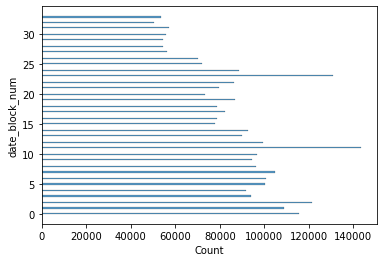

In [86]:

sns.histplot(data=df_train, y='date_block_num')

In [87]:
#sns.pairplot(df_train)

### handle outliers

In [88]:
df_train.query("item_price > 100_000")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,2013-12-13,11,12,6066,"307,980.00",1.00


In [89]:
df_train.query("item_id==6066")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,2013-12-13,11,12,6066,"307,980.00",1.00


In [90]:
df_items.query("item_id==6066")

,item_name,item_id,item_category_id
6066,Radmin 3 - 522 persons.,6066,75


In [91]:
print("the above item seems abnormal, to be deteted")

the above item seems abnormal, to be deteted


In [92]:
df_train.query("item_cnt_day > 900")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2326930,2015-01-15,24,12,20949,4.00,"1,000.00"
2909818,2015-10-28,33,12,11373,0.91,"2,169.00"


In [93]:
df_items.query("item_id==20949").T

,20949
item_name,Corporate package T-shirt 1C Interest white (34*42) 45 microns
item_id,20949
item_category_id,71


In [94]:
df_items.query("item_id==11373").T

,11373
item_name,Delivery to the point of issue (Boxberry)
item_id,11373
item_category_id,9


In [95]:
print("both records above might be of some events or promotions. We just keep these first")

both records above might be of some events or promotions. We just keep these first


In [96]:
df_train.query("item_price<0")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,2013-05-15,4,32,2973,-1.00,1.00


In [97]:
df_items.query("item_id==2973").T

,2973
item_name,"DmC Devil May Cry [PS3, Russian subtitles]"
item_id,2973
item_category_id,19


In [98]:
df_train.query("item_price<0")

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,2013-05-15,4,32,2973,-1.00,1.00


In [99]:


#save neccessary object to pickle_dict, which will be pickled at the end for kaggle test data
#pickle.dump(data, open('../datasets/data.pkl', 'wb')
#pickle_dict = dict()
#pickle_dict['df_train']=df_train
#pickle_dict['df_items']=df_items
#pickle_dict['df_shops']=df_shops
#pickle_dict['df_cat']=df_cat
#pickle_dict['df_test']=df_test

#pickle.dump(pickle_dict, open('./datasets/data.pkl', 'wb'))